# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [3]:
googl_df = pdr.get_data_yahoo("GOOGL", 
                              start = dt.datetime(2011, 8, 1), 
                              end = dt.datetime(2020, 7, 31))
googl_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-08-01,15.402903,14.994494,15.295796,15.184434,158485356.0,15.184434
2011-08-02,15.257007,14.804054,15.165165,14.824825,127895976.0,14.824825
2011-08-03,15.090090,14.605355,14.871622,15.044294,152874972.0,15.044294
2011-08-04,14.986236,14.451201,14.877377,14.452452,196387416.0,14.452452
2011-08-05,14.764765,14.064064,14.578078,14.490490,236926836.0,14.490490
...,...,...,...,...,...,...
2020-07-27,76.877998,75.616501,75.663002,76.471497,27124000.0,76.471497
2020-07-28,76.300499,75.026001,76.250000,75.182503,30910000.0,75.182503
2020-07-29,76.666496,75.150497,75.250000,76.175499,22676000.0,76.175499


In [4]:
googl_df['RETURN'] = np.log(googl_df['Adj Close'] / googl_df["Adj Close"].shift(1))
googl_df["SMA_42"] = googl_df["Adj Close"].rolling(window = 42).mean()

In [5]:
googl_df["Upper_Threhold"] = 2 * googl_df['Adj Close'].rolling(window = 42).std()
googl_df['Lower_Threhold'] = -2 * googl_df['Adj Close'].rolling(window = 42).std()

In [6]:
googl_df["DIST"] = googl_df["Adj Close"] - googl_df["SMA_42"]

In [7]:
googl_df['Position'] = np.where(googl_df['DIST'] > googl_df['Upper_Threhold'], -1, np.nan)
googl_df["Position"] = np.where(googl_df['DIST'] < googl_df['Lower_Threhold'], 1, googl_df['Position'])

In [8]:
googl_df

,High,Low,Open,Close,Volume,Adj Close,RETURN,SMA_42,Upper_Threhold,Lower_Threhold,DIST,Position
Date,,,,,,,,,,,,
2011-08-01,15.402903,14.994494,15.295796,15.184434,158485356.0,15.184434,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-02,15.257007,14.804054,15.165165,14.824825,127895976.0,14.824825,-0.023968,NaN,NaN,NaN,NaN,NaN
2011-08-03,15.090090,14.605355,14.871622,15.044294,152874972.0,15.044294,0.014696,NaN,NaN,NaN,NaN,NaN
2011-08-04,14.986236,14.451201,14.877377,14.452452,196387416.0,14.452452,-0.040135,NaN,NaN,NaN,NaN,NaN
2011-08-05,14.764765,14.064064,14.578078,14.490490,236926836.0,14.490490,0.002629,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,76.877998,75.616501,75.663002,76.471497,27124000.0,76.471497,0.013972,73.369488,4.979908,-4.979908,3.102008,NaN
2020-07-28,76.300499,75.026001,76.250000,75.182503,30910000.0,75.182503,-0.017000,73.471167,4.948597,-4.948597,1.711336,NaN
2020-07-29,76.666496,75.150497,75.250000,76.175499,22676000.0,76.175499,0.013121,73.578298,4.984043,-4.984043,2.597201,NaN


In [9]:
googl_df.Position.unique()

array([nan, -1.,  1.])

### <font color = red> Answer 1 is presented in the cell below: </font>

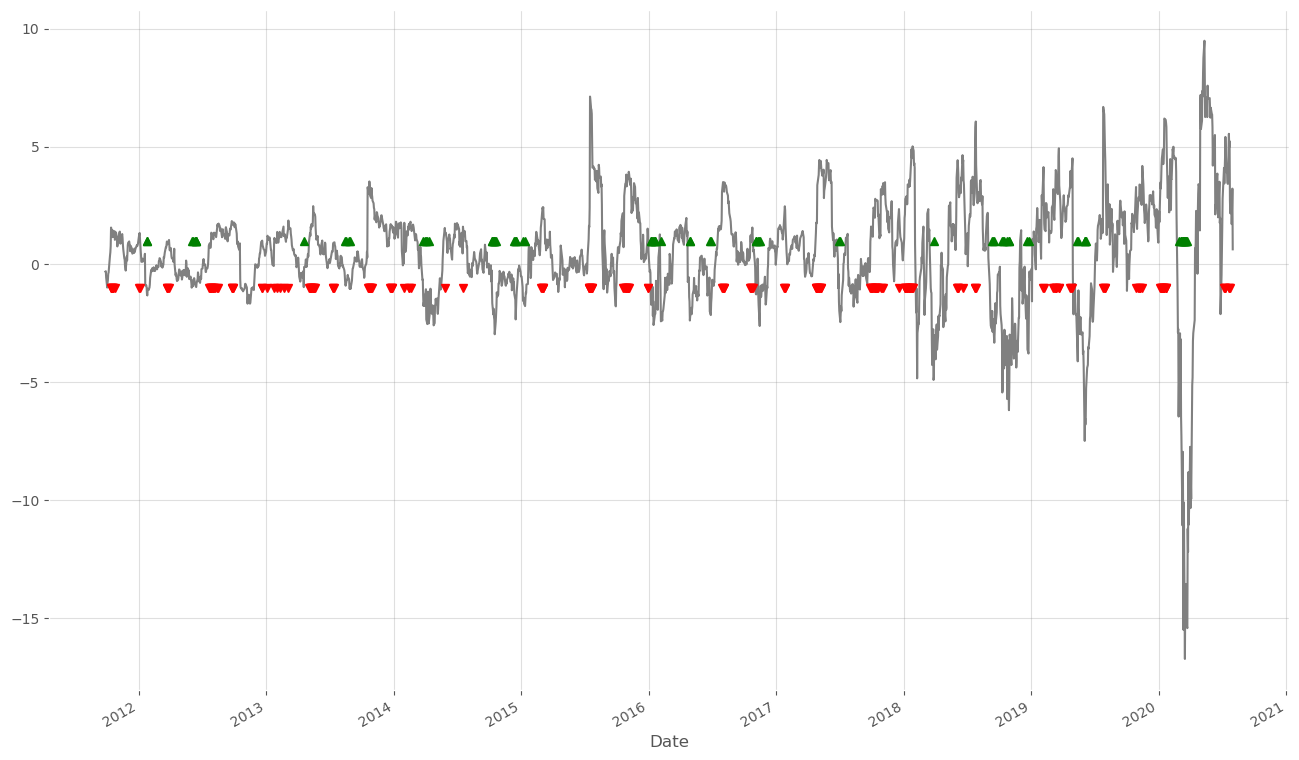

In [10]:
googl_df['DIST'].plot(figsize = (16, 10), color = 'grey')

plt.plot(googl_df['Position'][googl_df['Position'] == 1].index, 
    googl_df['Position'][googl_df['Position'] == 1], "g^",
        googl_df['Position'][googl_df['Position'] == -1].index, 
        googl_df['Position'][googl_df['Position'] == -1], "rv")

plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [11]:
apple_df = pdr.get_data_yahoo("AAPL", 
                  start = dt.datetime(2011, 8, 1), 
                  end = dt.datetime(2020, 7, 31))

amazon_df = pdr.get_data_yahoo("AMZN", 
                  start = dt.datetime(2011, 8, 1), 
                  end = dt.datetime(2020, 7, 31))

In [12]:
apple_df["RETURN"] = np.log(apple_df['Adj Close'] / apple_df["Adj Close"].shift(1))
apple_df['SMA_42'] = apple_df['Adj Close'].rolling(window = 42).mean()
apple_df['Upper_Threhold'] = 2 * apple_df['Adj Close'].rolling(window = 42).std()
apple_df['Lower_Threhold'] = -2 * apple_df['Adj Close'].rolling(window = 42).std()
apple_df['DIST'] = apple_df['Adj Close'] - apple_df['SMA_42']
apple_df['POSITION'] = np.where(apple_df['DIST'] > apple_df['Upper_Threhold'], -1, np.nan)
apple_df['POSITION'] = np.where(apple_df["DIST"] < apple_df['Lower_Threhold'], 1, apple_df['POSITION'])
apple_df['POSITION'] = np.where(apple_df['DIST'] * apple_df['DIST'].shift(1) < 0, 0, apple_df["POSITION"])
apple_df['POSITION'] = apple_df['POSITION'].ffill().fillna(0)
apple_df['STRATEGY'] = apple_df['POSITION'].shift(1) * apple_df['RETURN']

In [13]:
amazon_df['RETURN'] = np.log(amazon_df['Adj Close'] / amazon_df['Adj Close'].shift(1))
amazon_df['SMA_42'] = amazon_df['Adj Close'].rolling(window = 42).mean()
amazon_df['Upper_Threhold'] = 2 * amazon_df['Adj Close'].rolling(window = 42).std()
amazon_df['Lower_Threhold'] = -2 * amazon_df['Adj Close'].rolling(window = 42).std()
amazon_df['DIST'] = amazon_df['Adj Close'] - amazon_df['SMA_42']
amazon_df['POSITION'] = np.where(amazon_df['DIST'] > amazon_df['Upper_Threhold'], -1, np.nan)
amazon_df['POSITION'] = np.where(amazon_df['DIST'] < amazon_df['Lower_Threhold'], 1, amazon_df['POSITION'])
amazon_df['POSITION'] = np.where(amazon_df['DIST'] * amazon_df['DIST'].shift(1) < 0, 0, amazon_df['POSITION'])
amazon_df['POSITION'] = amazon_df['POSITION'].ffill().fillna(0)
amazon_df['STRATEGY'] = amazon_df['POSITION'].shift(1) * amazon_df['RETURN']

In [14]:
# annual apple sharpe ratio
apple_sharpe = np.sqrt(253) * (apple_df['STRATEGY'].mean() / apple_df['STRATEGY'].std())
apple_sharpe

-0.4093377442638938

In [15]:
# annual amazon sharpe ratio
amazon_sharpe = np.sqrt(253) * (amazon_df['STRATEGY'].mean() / amazon_df['STRATEGY'].std())
amazon_sharpe

-0.27690796692277464

In [16]:
# apple sharpe ratio print
print("The Sharpe Ratio for stock of Apple is {}".format(apple_sharpe))

The Sharpe Ratio for stock of Apple is -0.4093377442638938


In [17]:
# amazon sharpe ratio print
print('The Sharpe Ratio for stock of Amazon is {}'.format(amazon_sharpe))

The Sharpe Ratio for stock of Amazon is -0.27690796692277464


In [18]:
max(amazon_sharpe, apple_sharpe)

-0.27690796692277464

In [19]:
print("The answer is the stock of Amazon has greater Sharpe Ratio, which is {}"\
      .format(round(max(apple_sharpe, amazon_sharpe), 4)))

The answer is the stock of Amazon has greater Sharpe Ratio, which is -0.2769


### <font color = red> Answer 2 </font>

    The answer is _____stock of Amazon has greater Sharpe Ratio_______ .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [20]:
capital_base = float(200000.0)
apple_df['POSITION'] = apple_df['POSITION'].ffill()

In [21]:
our_position_apple = pd.DataFrame(index = apple_df.index).fillna(0.0)
our_position_apple['APPL'] = 200 * apple_df['POSITION']
# our_position['GOOGL'] = 200 * googl_df['Position']
# our_position['AMZN'] = 200 * amazon_df['POSITION']
our_position_apple

,APPL
Date,
2011-08-01,0.0
2011-08-02,0.0
2011-08-03,0.0
2011-08-04,0.0
2011-08-05,0.0
...,...
2020-07-27,-200.0
2020-07-28,-200.0
2020-07-29,-200.0


In [22]:
our_portfolio_apple = our_position_apple.multiply(apple_df['Adj Close'], 
                                                          axis = 0)
# our_position['GOOGL'] = our_position.GOOGL.multiply(googl_df['Adj Close'], axis = 0)
# our_position['AMZN'] = our_position.AMZN.multiply(amazon_df['Adj Close'], axis = 0)

our_portfolio_apple

,APPL
Date,
2011-08-01,0.000000
2011-08-02,0.000000
2011-08-03,0.000000
2011-08-04,0.000000
2011-08-05,0.000000
...,...
2020-07-27,-18671.139526
2020-07-28,-18364.418030
2020-07-29,-18716.435242


In [23]:
diff_in_shares_owned = our_position_apple.diff()

diff_in_shares_owned

,APPL
Date,
2011-08-01,NaN
2011-08-02,0.0
2011-08-03,0.0
2011-08-04,0.0
2011-08-05,0.0
...,...
2020-07-27,0.0
2020-07-28,0.0
2020-07-29,0.0


In [24]:
our_portfolio_apple["our_holdings"] = (our_position_apple.multiply(apple_df['Adj Close'],
                                                       axis = 0)
                                 ).sum(axis = 1)

In [25]:
our_portfolio_apple

,APPL,our_holdings
Date,,
2011-08-01,0.000000,0.000000
2011-08-02,0.000000,0.000000
2011-08-03,0.000000,0.000000
2011-08-04,0.000000,0.000000
2011-08-05,0.000000,0.000000
...,...,...
2020-07-27,-18671.139526,-18671.139526
2020-07-28,-18364.418030,-18364.418030
2020-07-29,-18716.435242,-18716.435242


In [26]:
our_portfolio_apple['our_cash'] = capital_base - (diff_in_shares_owned.multiply(apple_df['Adj Close'], 
                                                                                     axis = 0)
                                                ).sum(axis = 1).cumsum()
our_portfolio_apple

,APPL,our_holdings,our_cash
Date,,,
2011-08-01,0.000000,0.000000,200000.000000
2011-08-02,0.000000,0.000000,200000.000000
2011-08-03,0.000000,0.000000,200000.000000
2011-08-04,0.000000,0.000000,200000.000000
2011-08-05,0.000000,0.000000,200000.000000
...,...,...,...
2020-07-27,-18671.139526,-18671.139526,211153.324509
2020-07-28,-18364.418030,-18364.418030,211153.324509
2020-07-29,-18716.435242,-18716.435242,211153.324509


In [27]:
our_portfolio_apple['total'] = our_portfolio_apple['our_cash'] + our_portfolio_apple['our_holdings']
our_portfolio_apple

,APPL,our_holdings,our_cash,total
Date,,,,
2011-08-01,0.000000,0.000000,200000.000000,200000.000000
2011-08-02,0.000000,0.000000,200000.000000,200000.000000
2011-08-03,0.000000,0.000000,200000.000000,200000.000000
2011-08-04,0.000000,0.000000,200000.000000,200000.000000
2011-08-05,0.000000,0.000000,200000.000000,200000.000000
...,...,...,...,...
2020-07-27,-18671.139526,-18671.139526,211153.324509,192482.184982
2020-07-28,-18364.418030,-18364.418030,211153.324509,192788.906479
2020-07-29,-18716.435242,-18716.435242,211153.324509,192436.889267


In [28]:
our_portfolio_apple['return'] = our_portfolio_apple['total'].pct_change()
our_portfolio_apple

,APPL,our_holdings,our_cash,total,return
Date,,,,,
2011-08-01,0.000000,0.000000,200000.000000,200000.000000,NaN
2011-08-02,0.000000,0.000000,200000.000000,200000.000000,0.000000
2011-08-03,0.000000,0.000000,200000.000000,200000.000000,0.000000
2011-08-04,0.000000,0.000000,200000.000000,200000.000000,0.000000
2011-08-05,0.000000,0.000000,200000.000000,200000.000000,0.000000
...,...,...,...,...,...
2020-07-27,-18671.139526,-18671.139526,211153.324509,192482.184982,-0.002241
2020-07-28,-18364.418030,-18364.418030,211153.324509,192788.906479,0.001594
2020-07-29,-18716.435242,-18716.435242,211153.324509,192436.889267,-0.001826


### <font color = red> Answer 3 </font>

    GOOGL : _____149310.9169_______ 
    
    AAPL  : ______85535.0933______ 
     
    AMZN  : _____112025.8221_______ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [29]:
# googl CAGR
googl_days = (googl_df.index[-1] - googl_df.index[0]).days
googl_CAGR = (np.exp(googl_df['STRATEGY'].sum())) ** (1 / (googl_days / 365)) - 1
googl_CAGR

KeyError: 'STRATEGY'

In [ ]:
print('The compound annual growth rate of security of GOOGL is {}'. format(round(googl_CAGR, 4)))

In [ ]:
# apple CAGR
apple_days = (apple_df.index[-1] - apple_df.index[0]).days
apple_CAGR = (np.exp(apple_df['STRATEGY'].sum())) ** (1 / (apple_days / 365)) - 1
apple_CAGR

In [ ]:
print("The compound annual growth rates of security of AAPL is {}".format(round(apple_CAGR, 4)))

In [ ]:
# amazon CAGR
amazon_days = (amazon_df.index[-1] - amazon_df.index[0]).days
amazon_CAGR = (np.exp(amazon_df['STRATEGY'].sum())) ** (1 / (amazon_days / 365)) - 1
amazon_CAGR

In [ ]:
print('The compound annual growth rates of security of AMZN is {}'.format(round(amazon_CAGR, 4)))

### <font color = red> Answer 4 </font>

    GOOGL : ______-0.0319______ 
    
    AAPL  : ______-0.09______ 
     
    AMZN  : ______-0.0623______ 

## 👇 Questions 5 to 7 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 5. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [ ]:
# GS
gs_df = pdr.get_data_yahoo("GS", 
                           start = dt.datetime(2013, 11, 1), 
                           end = dt.datetime(2021, 10, 31))

In [ ]:
gs_df['RETURN'] = np.log(gs_df['Adj Close'] / gs_df['Adj Close'].shift(1))

In [ ]:
gs_df['SMA_24'] = gs_df['Adj Close'].rolling(window = 24).mean()
gs_df['SMA_58'] = gs_df['Adj Close'].rolling(window = 58).mean()

In [ ]:
gs_df['POSITION'] = np.where(gs_df['SMA_24'] < gs_df['SMA_58'], -1, 1)

In [ ]:
gs_df.dropna(inplace = True)

In [ ]:
gs_df["STRATEGY"] = gs_df['POSITION'].shift(1) * gs_df['RETURN']

In [ ]:
gs_df['CUMULATIVE_RETURNS'] = gs_df['STRATEGY'].cumsum().apply(np.exp)
gs_df['MAX_GROSS_PERFORMANCE'] = gs_df['CUMULATIVE_RETURNS'].cummax()

In [ ]:
# JPM
jpm_df = pdr.get_data_yahoo("JPM", 
                            start = dt.datetime(2013, 11, 1), 
                            end = dt.datetime(2021, 10, 31))

In [ ]:
jpm_df['RETURN'] = np.log(jpm_df['Adj Close'] / jpm_df['Adj Close'].shift(1))
jpm_df['SMA_24'] = jpm_df['Adj Close'].rolling(window = 24).mean()
jpm_df['SMA_58'] = jpm_df['Adj Close'].rolling(window = 58).mean()
jpm_df['POSITION'] = np.where(jpm_df['SMA_24'] < jpm_df['SMA_58'], -1, 1)

In [ ]:
jpm_df.dropna(inplace = True)

In [ ]:
jpm_df['STRATEGY'] = jpm_df['POSITION'].shift(1) * jpm_df['RETURN']

In [ ]:
jpm_df['CUMULATIVE_RETURNS'] = jpm_df['STRATEGY'].cumsum().apply(np.exp)
jpm_df['MAX_GROSS_PERFORMANCE'] = jpm_df['CUMULATIVE_RETURNS'].cummax()

### <font color = red> Answer 5 (`visualization component`) is presented in the cell below: </font>

In [ ]:
# GS visualization
gs_df[['CUMULATIVE_RETURNS', "MAX_GROSS_PERFORMANCE"]].dropna().plot(figsize = (16, 10))

In [ ]:
# JPM visualization
jpm_df[["CUMULATIVE_RETURNS", 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

In [ ]:
# GS maximum drawdown
gs_drawdown = gs_df['MAX_GROSS_PERFORMANCE'] - gs_df['CUMULATIVE_RETURNS']
gs_drawdown.max()

In [ ]:
# GS longest drawdown period
gs_period = gs_drawdown[gs_drawdown == 0].index[1:].to_pydatetime() - gs_drawdown[gs_drawdown == 0].index[:-1].to_pydatetime()
gs_period.max().days

In [ ]:
print("As to GS, the maximum drawdown is about {} percentage points".format(round(gs_drawdown.max() * 100, 4)))

In [ ]:
print("As to GS, the longest drawdown period lasts for {} days".format(gs_period.max().days))

In [ ]:
# JPM drawdown
jpm_drawdown = (jpm_df['MAX_GROSS_PERFORMANCE'] - jpm_df['CUMULATIVE_RETURNS'])
jpm_drawdown.max()

In [ ]:
# JPM longest drawdown period
jpm_period = jpm_drawdown[jpm_drawdown == 0].index[1:].to_pydatetime() - jpm_drawdown[jpm_drawdown == 0].index[:-1].to_pydatetime()
jpm_period.max().days

In [ ]:
print("As to JPM, the maximum drawdown is about {} percentage points".format(round(jpm_drawdown.max() * 100, 4)))

In [ ]:
print("As to JPM, the longest drawdown period lasts for {} days".format(jpm_period.max().days))

### <font color = red> Answer 5 </font>
    
    As to GS,
    
    The maximum drawdown is about ____________ percentage points.
    The longest drawdown period lasts for _____________ days.
    
    As to JPM,
    
    The maximum drawdown is about ____________ percentage points.
    The longest drawdown period lasts for _____________ days.
    

###  <font color = blue> 👉 Question 6. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [ ]:
capital_base = 300000

In [ ]:
# security of GS
gs_gain = capital_base * gs_df['CUMULATIVE_RETURNS'][-1]
gs_gain

In [ ]:
print("There are ${} left in my account after trading according to strategy for security of GS".format(round(gs_gain, 4)))

In [ ]:
# security of JPM
jpm_gain = capital_base * jpm_df['CUMULATIVE_RETURNS'][-1]
jpm_gain

In [ ]:
print("There are ${} left in my account after trading according to strategy for security of JPM".format(round(jpm_gain, 4)))

### <font color = red> Answer 6 </font>

    The answer is ____________________________ .

###  <font color = blue> 👉 Question 7. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [ ]:
gs_trading = ((gs_df["POSITION"] * gs_df['POSITION'].shift(1)) < 0).sum()
gs_trading

In [ ]:
print("The trading opportunities for GS are {} using the current momentum strategy".format(gs_trading))

In [ ]:
jpm_trading = (jpm_df['POSITION'] * jpm_df['POSITION'].shift(1) < 0).sum()
jpm_trading

In [ ]:
print("The trading opportunities for JPM are {} using the current momentum strategy.".format(jpm_trading))

### <font color = red> Answer 7 </font>

    The answer is ____________________________ .

## 👇 Questions 8 and 10 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 8. </font> 

### Here, first, predict tomorrow’s index level given the index level of today, yesterday, the day before yesterday—namely, three lags.

### Then, also predict tomorrow’s index level, using 30 lags.  <font color = blue> Choose between the two lags that give you better prediction results for your answer to this question</font>.

### Use `scikit-learn` module with solver `lbfgs`, setting `C` at `1e7`, `max_iter` at `1000`.

### Plot the gross performance of the base instrument and the strategy over time (in-sample, no transaction costs).

### Below are the lines of code that lead to an answer:

In [ ]:
# lag 3
ge_df = pdr.get_data_yahoo('GE', 
                          start = dt.datetime(2013, 11, 1), 
                          end = dt.datetime(2021, 10, 31))

In [ ]:
ge_df['RETURN'] = np.log(ge_df["Close"] / ge_df['Close'].shift(1))


In [ ]:
ge_df.dropna(inplace = True)

In [ ]:
lag = 3

COLS = []

for lag in range(1, lag + 1):
    col = "lag_{}".format(lag)
    ge_df[col] = ge_df['RETURN'].shift(lag)
    COLS.append(col)
    
ge_df.dropna(inplace = True)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [ ]:
M = linear_model.LogisticRegression(solver = "lbfgs",
                                    C = 1e7,
                                    multi_class = "auto",
                                    max_iter = 1000)

In [ ]:
M = linear_model.LogisticRegression(solver = 'lbfgs', 
                                   C = 1e7,
                                   max_iter = 1000)

In [ ]:
M.fit(ge_df[COLS], 
     np.sign(ge_df["RETURN"]))

In [ ]:
ge_df['PREDICTION'] = M.predict(ge_df[COLS])
ge_df['STRATEGY'] = ge_df['PREDICTION'] * ge_df['RETURN']

In [ ]:
# gross performance of lag 3
ge_df[['RETURN', "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10))

In [ ]:
# lag 30
ge_df2 = pdr.get_data_yahoo("GE", 
                           start = dt.datetime(2013, 11, 1), 
                           end = dt.datetime(2021, 10, 31))

In [ ]:
ge_df2['RETURN'] = np.log(ge_df2['Close'] / ge_df2['Close'].shift(1))
ge_df2.dropna(inplace = True)

In [ ]:
lag = 30

COLS = []

for lag in range (1, lag + 1):
    col = "lag_{}".format(lag)
    ge_df2[col] = ge_df2['RETURN'].shift(lag)
    COLS.append(col)
    
ge_df2.dropna(inplace = True)

In [ ]:
M2 = linear_model.LogisticRegression(solver = 'lbfgs', 
                                    C = 1e7, 
                                    max_iter = 1000)

In [ ]:
M2.fit(ge_df2[COLS], 
      np.sign(ge_df2['RETURN']))

In [ ]:
ge_df2['PREDICTION'] = M2.predict(ge_df2[COLS])
ge_df2['STRATEGY'] = ge_df2['PREDICTION'] * ge_df2['RETURN']

In [ ]:
ge_df2[['RETURN', "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10))

### <font color = red> Answer 8 </font>

    The answer is ____________lag with 30 have better prediction________________ .

###  <font color = blue> 👉 Question 9. </font> Now let's come up with performance metrics of accuracy.

### Below are the lines of code that lead to an answer:

In [ ]:
accuracy = np.sign(GOLD["RETURN"].iloc[lags:] * 
                   GOLD["PREDICTION"].iloc[lags:]
                  ).value_counts()

accuracy

In [ ]:
# lag 3
lag = 3

np.sign(ge_df['RETURN'].iloc[lag:] * 
       ge_df['PREDICTION'].iloc[lag:]).value_counts()

In [ ]:
accuracy_score(ge_df['PREDICTION'], 
              np.sign(ge_df['RETURN']))

In [ ]:
print("For prediction with lag is 3, the prediction is 1020 times correct and 956 wrong. The accuracy is {}"\
     .format(round(accuracy_score(ge_df['PREDICTION'], 
                           np.sign(ge_df['RETURN'])), 4)))

In [ ]:
# lag 30
lag = 30
np.sign(ge_df2['RETURN'].iloc[lag:] * 
       ge_df2['PREDICTION'].iloc[lag:]).value_counts()

In [ ]:
accuracy_score(ge_df2['PREDICTION'], 
              np.sign(ge_df2['RETURN']))

In [ ]:
print("For prediction with lag is 30, the prediction is 1047 times correct and 877 wrong. The accuracy is {}"\
     .format(round(accuracy_score(ge_df2['PREDICTION'], 
                                 np.sign(ge_df2['RETURN'])), 5)))

### <font color = red> Answer 9 </font>
    Here, the prediction is _____ times correct and _____ wrong. The accuracy is ______ %.

###  <font color = blue> 👉 Question 10. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [ ]:
amazon_sharpe = np.sqrt(253) * (amazon_df['STRATEGY'].mean() / amazon_df['STRATEGY'].std())


In [ ]:
# lag 3
sharpe1 = np.sqrt(253) * (ge_df['STRATEGY'].mean() / ge_df['STRATEGY'].std())
sharpe1

In [ ]:
# lag 30
sharpe2 = np.sqrt(253) * (ge_df2['STRATEGY'].mean() / ge_df2['STRATEGY'].std())
sharpe2

In [ ]:
print("Classification algorithm-based strategy with lag 3 for GE leads to a Sharpe ratio of {}"\
      .format(round(sharpe1, 4)))

In [ ]:
print("Classification algorithm-based strategy with lag 30 for GE leads to a Sharpe ratio of {}"\
     .format(round(sharpe2, 4)))

### <font color = red> Answer 10 </font>

    Classification algorithm-based strategy for GE leads to a Sharpe ratio of __________ .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊